# Creación y entrenamiento de una CNN (Preliminar)

A lo largo de esta sección, se realiza el ejercicio de crear una Red Neuronal Convolucional y llevar a cabo su entrenamiento con el conjunto de datos de Train. La idea es entrenar esta red para clasificar imágenes de acuerdo a las 17 super categorías del dataset RPC. Cabe destacar que, en este notebook, no se realizó validación cruzada para pérdida ni para precisión. 

## Contenido

#### 1.  Importación de librerías y cargue del dataset RPC
#### 2. Creación del Modelo CNN
#### 3. Entrenamiento del modelo

## 1. Importación de librerías y cargue del dataset RPC

A continuación, se cargan algunas de las librerías necesarias para completar esta tarea:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
%matplotlib inline

Se lee el archivo json que contiene información del dataset y se dividen en datasets de imágenes y etiquetas.

In [34]:
data_df = pd.read_json('./data/instances_train2019.json', lines=True)
categories = data_df['categories'][0]
categories = df = pd.DataFrame.from_dict(categories, orient='columns')
annotations = data_df['annotations'][0]
annotations = df = pd.DataFrame.from_dict(annotations, orient='columns')
images = data_df['images'][0]
images = df = pd.DataFrame.from_dict(images, orient='columns')

annot_x_categ = pd.merge(annotations, categories, how='left', left_on=['category_id'], right_on=['id'])
y_names = annot_x_categ['supercategory'].unique().tolist()
annot_x_categ_file_names = pd.merge(annot_x_categ, images, how='left', left_on=['image_id'], right_on=['id'])
y_data = np.array(annot_x_categ_file_names['supercategory'].values)
X_data = np.array(annot_x_categ_file_names['file_name'].values)
num_classes = len(y_names)

X_data.shape, y_data.shape, num_classes

((53739,), (53739,), 17)

In [28]:
annot_x_categ_file_names

,area,bbox,category_id,id_x,image_id,iscrowd,point_xy,segmentation,id_y,name,supercategory,file_name,height,id,width
0,111763.29,"[1188.4, 1052.45, 390.96, 285.87]",112,0,0,0,"[1383.88, 1195.38]",[[]],112,112_canned_food,canned_food,038900004095_camera0-13.jpg,1944,0,2592
1,110516.13,"[1214.89, 1053.72, 392.36, 281.67]",112,1,1,0,"[1411.07, 1194.56]",[[]],112,112_canned_food,canned_food,038900004095_camera0-18.jpg,1944,1,2592
2,108233.00,"[1180.52, 1055.31, 384.33, 281.62]",112,2,2,0,"[1372.68, 1196.12]",[[]],112,112_canned_food,canned_food,038900004095_camera0-11.jpg,1944,2,2592
3,113598.14,"[1171.68, 1047.6, 399.85, 284.1]",112,3,3,0,"[1371.61, 1189.65]",[[]],112,112_canned_food,canned_food,038900004095_camera0-10.jpg,1944,3,2592
4,115162.14,"[1197.98, 1052.86, 413.0, 278.84]",112,4,4,0,"[1404.48, 1192.28]",[[]],112,112_canned_food,canned_food,038900004095_camera0-17.jpg,1944,4,2592
5,103052.05,"[1253.23, 1050.23, 384.06, 268.32]",112,5,5,0,"[1445.26, 1184.39]",[[]],112,112_canned_food,canned_food,038900004095_camera0-24.jpg,1944,5,2592
6,112387.17,"[1237.44, 1042.34, 391.96, 286.73]",112,6,6,0,"[1433.42, 1185.7]",[[]],112,112_canned_food,canned_food,038900004095_camera0-22.jpg,1944,6,2592
7,107826.88,"[1250.6, 1047.6, 386.7, 278.84]",112,7,7,0,"[1443.95, 1187.02]",[[]],112,112_canned_food,canned_food,038900004095_camera0-25.jpg,1944,7,2592
8,112387.10,"[1197.98, 1044.97, 391.96, 286.73]",112,8,8,0,"[1393.96, 1188.34]",[[]],112,112_canned_food,canned_food,038900004095_camera0-15.jpg,1944,8,2592
9,107992.49,"[1230.96, 1052.49, 385.49, 280.15]",112,9,9,0,"[1423.7, 1192.57]",[[]],112,112_canned_food,canned_food,038900004095_camera0-19.jpg,1944,9,2592


Se divide el conjunto de datos entre train y test.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42991,), (10748,), (42991,), (10748,))

Se crea un dataframe con el conjunto de datos de train.

In [51]:
columns = ['filename','class']

df_train = pd.DataFrame(columns=columns)
df_train['filename'] = X_train.astype(str)
df_train['class'] = y_train.astype(str)

Se utiliza  $\textbf{ImageDataGenerator}$ para normalizar las imágenes. Se define un tamaño de batch de 20 imágenes y un tamaño de imágen de 200x200. Finalmente, se define la función con la que se cargarán las imágenes por lotes para train.

In [53]:
datagen = ImageDataGenerator(rescale=1./255, fill_mode='nearest')
batch_size = 20
img_size = 200

train_generator_fn = lambda: datagen.flow_from_dataframe(
        df_train,  
        directory="./data/train2019/", 
        x_col='filename', 
        y_col='class',
        target_size=(img_size, img_size),  
        batch_size=batch_size,
        interpolation = 'nearest',
        class_mode='categorical') 

## 2. Creación del Modelo CNN

A continuación, se define la red de acuerdo a las especificaciones definidas por los autores de este trabajo, con optimizador $\textbf{adam}$ y función de pérdida $\textbf{categorical crossentropy}$.

In [42]:
def get_conv_model(num_classes, img_size=200, compile=True):   
    tf.reset_default_graph()
    tf.keras.backend.clear_session()
    print "using",num_classes,"classes"
    inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
    layers = tf.keras.layers.Conv2D(100,(9,9), activation="relu")(inputs)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(50,(5,5), activation="relu")(layers)
    layers = tf.keras.layers.Dropout(0.3)(layers)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(25,(3,3), activation="relu")(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(64, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [43]:
model = get_conv_model(num_classes, img_size=200, compile=True)
model.summary()

using 17 classes
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 192, 192, 100)     24400     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 96, 96, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 50)        125050    
_________________________________________________________________
dropout (Dropout)            (None, 92, 92, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 25)        1127

## 3. Entrenamiento del modelo

En este punto, se realiza el entrenamiento utilizando recursos locales (6 Gb de memoria RAM Y 4 Núcles de procesamiento a 2.4 Ghz). Se utilizan 30 épocas con 50 pasos por época. 

In [54]:
model.fit_generator(
        train_generator_fn(),
        steps_per_epoch=1000 // batch_size,
        epochs=30)

Found 42991 images belonging to 17 classes.
Epoch 1/30
50/50 [==============================] - 4682s 94s/step - loss: 2.9665 - acc: 0.0930
Epoch 2/30
50/50 [==============================] - 769s 15s/step - loss: 2.8072 - acc: 0.1370
Epoch 3/30
50/50 [==============================] - 776s 16s/step - loss: 2.7630 - acc: 0.1470
Epoch 4/30
50/50 [==============================] - 962s 19s/step - loss: 2.7355 - acc: 0.1590
Epoch 5/30
50/50 [==============================] - 887s 18s/step - loss: 2.7257 - acc: 0.1400
Epoch 6/30
50/50 [==============================] - 899s 18s/step - loss: 2.7046 - acc: 0.1370
Epoch 7/30
50/50 [==============================] - 945s 19s/step - loss: 2.6728 - acc: 0.1700
Epoch 8/30
50/50 [==============================] - 916s 18s/step - loss: 2.5233 - acc: 0.1940
Epoch 9/30
50/50 [==============================] - 919s 18s/step - loss: 2.2978 - acc: 0.2550
Epoch 10/30
50/50 [==============================] - 919s 18s/step - loss: 2.3543 - acc: 0.2320
Epoc

Teniendo en cuenta que en este entrenamiento inicialmente no se realizaron gráficas de métricas que se almacenan en model.history, fue necesario tomar nota de manera posterior de los valores de pérdida y precisión por época para poder observar su comportamiento de forma gráfica.

In [2]:
loss=[2.9665, 2.8072, 2.7630, 2.7355, 2.7257, 2.7046, 2.6728, 2.5233, 2.2978, 2.3543, 2.1883, 2.0598, 1.9129, 1.7913, 1.7239, 1.6276, 1.5770, 1.5482, 1.4636, 1.4341, 1.4117, 1.3524, 1.3511, 1.2768, 1.1549, 1.1983, 1.1603, 1.1652, 1.1178, 1.0487]
acc=[0.0930, 0.1370, 0.1470, 0.1590, 0.1400, 0.1370, 0.1700, 0.1940, 0.2550, 0.2320, 0.2710, 0.2950, 0.3480, 0.3820, 0.4220, 0.4500, 0.4770, 0.4650, 0.4800, 0.5070, 0.5250, 0.5370, 0.5330, 0.5570, 0.6000, 0.5890, 0.5930, 0.5850, 0.5880, 0.6150]
len(loss), len(acc)

(30, 30)

In [3]:
def plot_metrics(acc,loss):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.plot(acc, label="acc")
    plt.grid()
    plt.legend();
    plt.xlabel("training step")
    plt.ylabel("accuracy")
    plt.ylim(0,1.05)

    plt.subplot(1,2,2)
    plt.plot(loss, lw=4, alpha=.5, label="loss")
    plt.grid();
    plt.legend();

    plt.show()

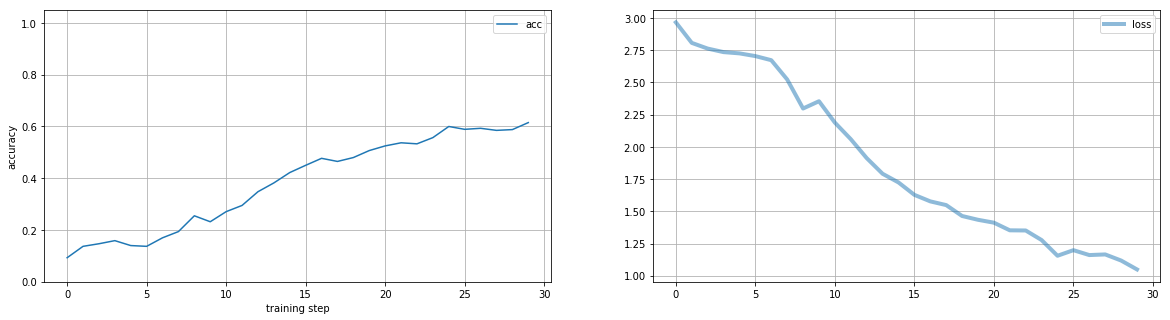

In [6]:
plot_metrics(acc,loss)

En nuestra primera aproximación, obtenemos un modelo con una precisión del 61.5%, la cual podría mejorar. Un aspecto importante es que, al no realizar validación cruzada, no es posible realizar conclusiones de un análisis a partir de este valor.

Por su parte, la pérdida presenta un comportamiento aceptable, ya que disminuye conforme aumenta el número de épocas. Sin embargo, presenta el mismo problema que la precisión debido a la ausencia de validación. 

A continuación, la red y los pesos resultantes del entrenamiento se almacenan en el archivo "CNN_Test.model"

In [55]:
model.save("CNN_Test.model")